<a href="https://colab.research.google.com/github/ulfiizza27/2141720052-PCVK-2023/blob/main/week-05/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Kelompok 2 :
| Nama                                | No | NIM        |
| ----------------------------------- | -- | ---------- |
| Ulfi Mustatiq Abidatul Izza         | 26 | 2141720052 |


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

## 1. Buat Gamma Correction sesuai dengan petunjuk berikut

Pada percobaan ini, nilai Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image dengan gamma correction sesuai rumus yang telah diberikan.


Gamma Correction pada citra
-------------------------------
Masukkan nilai Gamma: 3


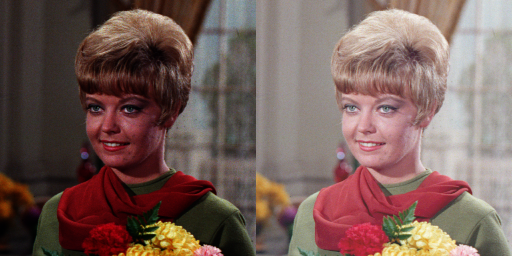

In [4]:

print('Gamma Correction pada citra')
print('-------------------------------')
try:
    gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
    print('Error, not a number')

# Membaca citra
original = cv.imread('/content/drive/MyDrive/PCVK/img/female.tiff')

# Mengecek apakah citra berhasil dibaca
if original is None:
    print('Citra tidak ditemukan.')
else:
    gamma_image = np.zeros(original.shape, original.dtype)

    for y in range(original.shape[0]):
        for x in range(original.shape[1]):
            for c in range(original.shape[2]):
                gamma_image[y, x, c] = np.clip(255 * pow(original[y, x, c] / 255, (1 / gamma)), 0, 255)

    final_frame = cv.hconcat((original, gamma_image))
    cv2_imshow(final_frame)

## 2. Buat Simulasi Image Depth

Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra, pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga 255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000 0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika 7bit, maka jumlah warnanya adalah 27 = 128, dst.

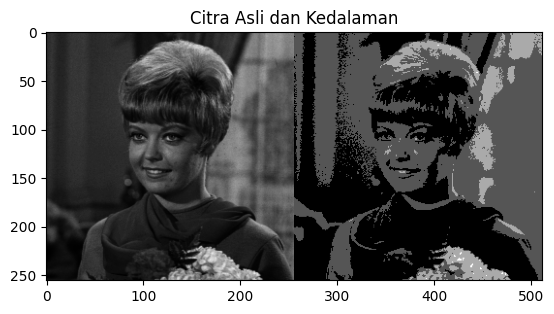

In [7]:
bit_depth = 2
level = 255 // (pow(2, bit_depth) - 1)

original = cv.imread('/content/drive/MyDrive/PCVK/img/female.tiff', cv.IMREAD_GRAYSCALE)

if original is not None:
    depth_image = np.zeros(original.shape, original.dtype)

    for y in range(original.shape[0]):
        for x in range(original.shape[1]):
            pixel_value = original[y, x]
            quantized_value = round(pixel_value / level) * level
            depth_image[y, x] = quantized_value

    # Menggabungkan citra asli dan citra kedalaman
    final_frame = cv.hconcat([original, depth_image])

    # Menampilkan citra gabungan menggunakan plt
    plt.imshow(final_frame, cmap='gray')
    plt.title('Citra Asli dan Kedalaman')

    plt.show()
else:
    print('Citra tidak ditemukan.')

## 3. Buat modul Average Denoising

Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab sebelumnya. Citra asli sudah disediakan pada **/images/galaxy.jpg.** 100 Citra dengan Gaussian Noise sudah disediakan pada **/images/noises/*.jpg** Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder , gunakan modul glob **(import glob)**.

Nilai PSNR untuk noise_number=5: 27.53854 dB


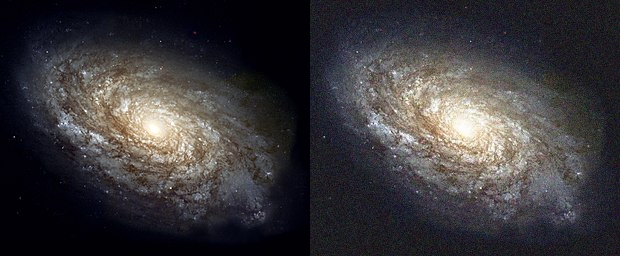

 
Nilai PSNR untuk noise_number=10: 27.55922 dB


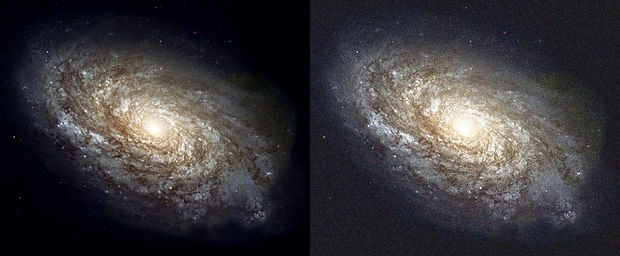

 
Nilai PSNR untuk noise_number=20: 27.55767 dB


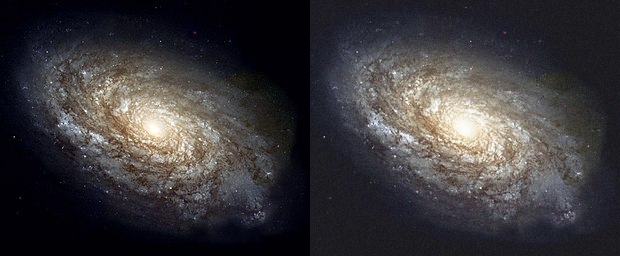

 
Nilai PSNR untuk noise_number=40: 27.50776 dB


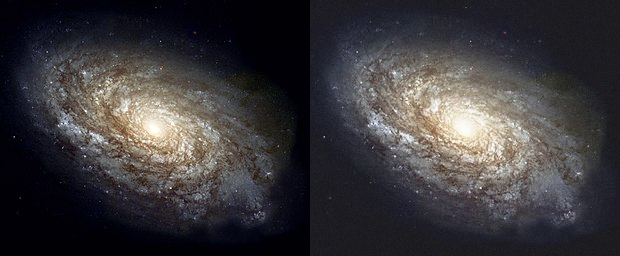

 
Nilai PSNR untuk noise_number=80: 27.50884 dB


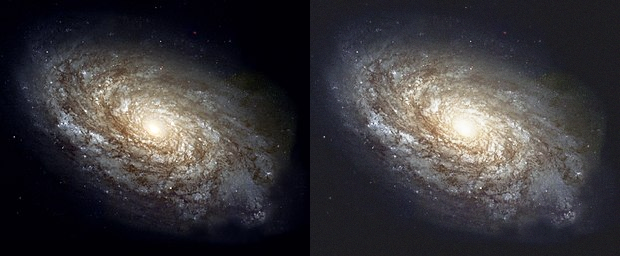

 
Nilai PSNR untuk noise_number=100: 27.51002 dB


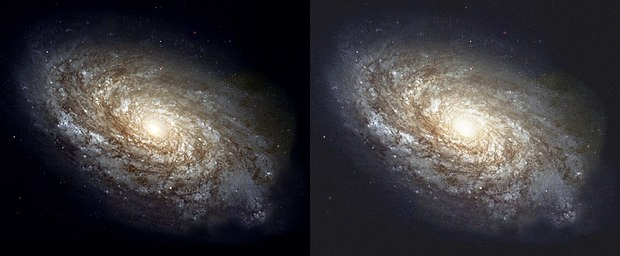

In [70]:
import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/PCVK/img/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/img/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

# Daftar nilai noise_number yang akan diuji
noise_numbers = [5, 10, 20, 40, 80, 100]

for noise_number in noise_numbers:
    dst = cv_img[0]
    for i in range(noise_number):
        if i == 0:
            pass
        else:
            alpha = 1.0 / (i + 1)
            beta = 1.0 - alpha
            dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

    def PSNR(original, compressed):
        mse = np.mean((original - compressed) ** 2)
        if(mse == 0):
            return 100
        max_pixel = 255.0
        psnr = 20 * log10(max_pixel / sqrt(mse))
        return psnr

    compressed = dst
    psnr = PSNR(original, compressed)

    print(f'Nilai PSNR untuk noise_number={noise_number}: {psnr:.5f} dB')
    galaxy_frame = cv.hconcat((original, dst))
    cv2_imshow(galaxy_frame)
    print(' ')

**Kesimpulan:**

Dalam proses ini, kita dapat melihat bahwa semakin besar noise_number, semakin baik kualitas hasil denoising dan semakin tinggi nilai PSNR. Namun, peningkatan nilai noise_number juga membutuhkan lebih banyak sumber daya komputasi. Oleh karena itu, pemilihan nilai noise_number harus seimbang antara kualitas hasil dan efisiensi komputasi.

## 4. Buat image masking untuk image berikut. Image kiri adalah image asli **(image KTP)**, sedangkan image paling kanan adalah hasilnya:
### Kelompok 2



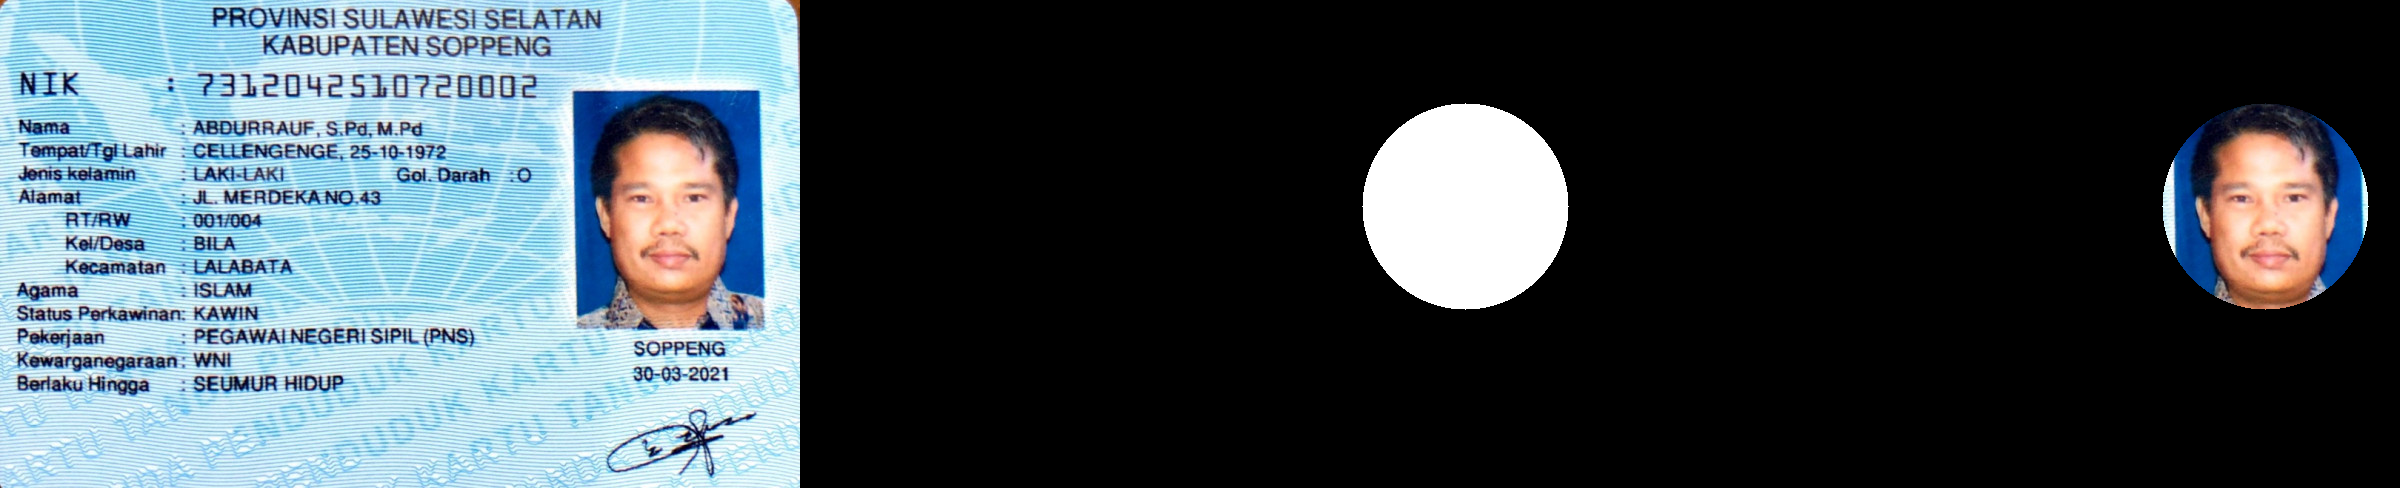

In [50]:
# Membaca gambar asli
original_image = cv.imread('/content/drive/MyDrive/PCVK/img/KTP.jpeg')

# Menentukan pusat dan jari-jari lingkaran pertama
center1 = (665, 206)  # (x, y) coordinates of the center of the first circle
radius1 = 103

# Membuat gambar  kosong
mask = np.zeros(original_image.shape, dtype=np.uint8)

# Gambarlah lingkaran pertama pada mask
cv.circle(mask, center1, radius1, (255, 255, 255), thickness=-1)  # White circle on black background

masked = original_image & mask

# Menampilkan gambar asli dan hasilnya
result = cv.hconcat((original_image, mask, masked))
cv2_imshow(result)

## 5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini. Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.

**NOT (Komplemen)**

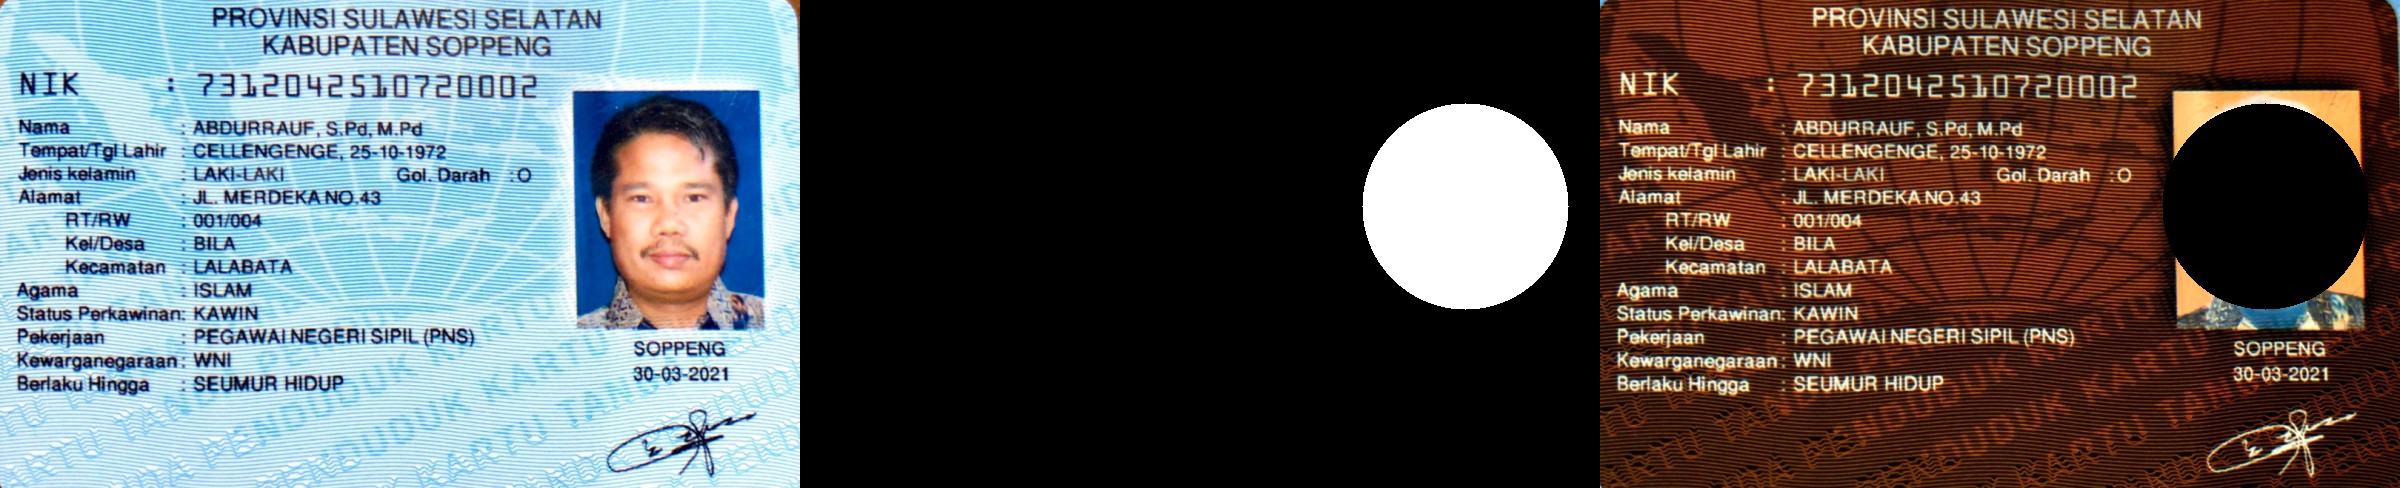

In [59]:
# Membaca gambar asli
original_image = cv.imread('/content/drive/MyDrive/PCVK/img/KTP.jpeg')

# Menentukan pusat dan jari-jari lingkaran pertama
center1 = (665, 206)  # (x, y) coordinates of the center of the first circle
radius1 = 103

# Membuat gambar  kosong
mask = np.zeros(original_image.shape, dtype=np.uint8)

# Gambarlah lingkaran pertama pada mask
cv.circle(mask, center1, radius1, (255, 255, 255), thickness=-1)  # White circle on black background

# Melakukan operasi NOT
masked = ~original_image & ~mask

# Menampilkan gambar asli dan hasilnya
result = cv.hconcat((original_image, mask, masked))
cv2_imshow(result)

**OR (Atau)**

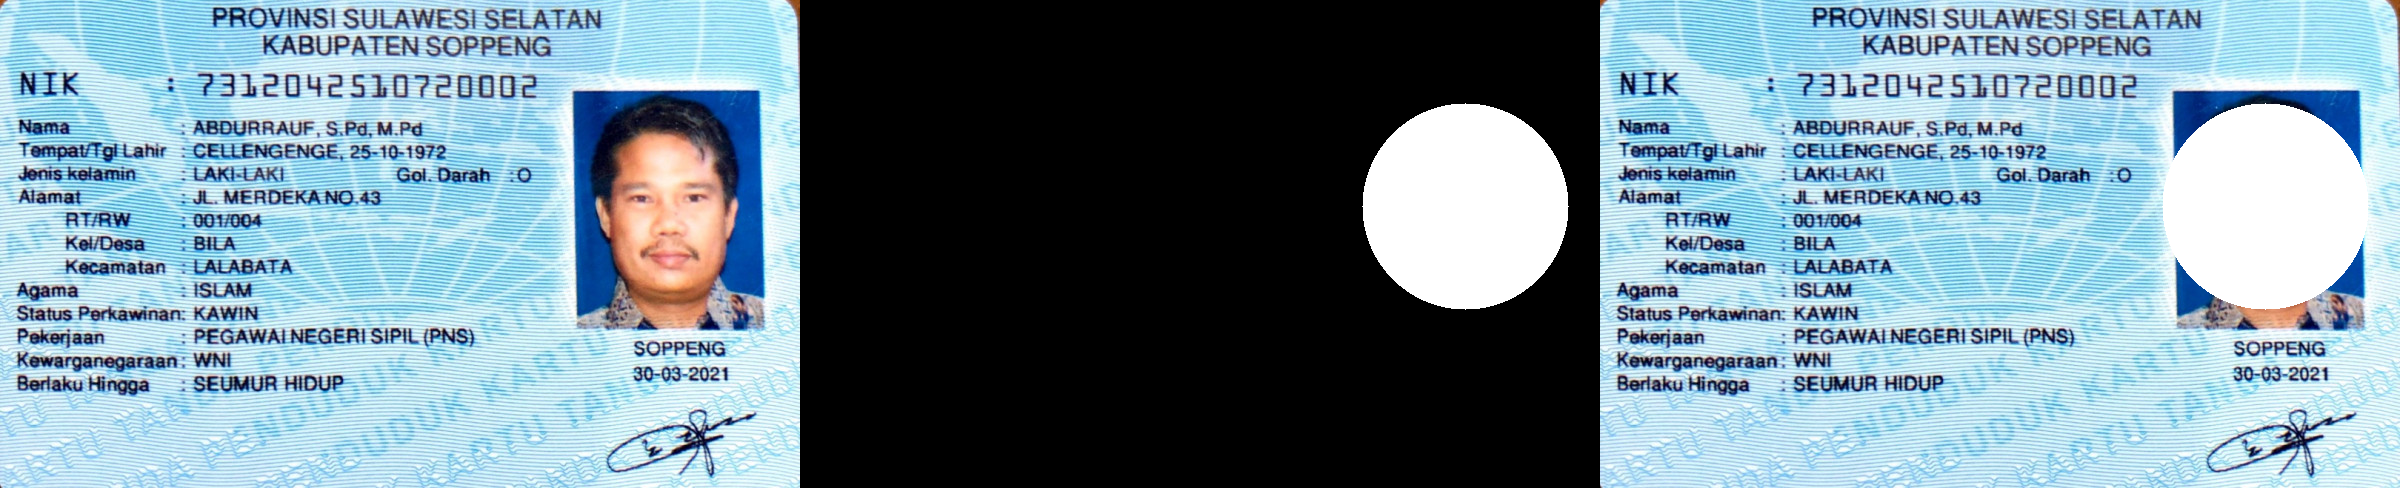

In [61]:
# Membaca gambar asli
original_image = cv.imread('/content/drive/MyDrive/PCVK/img/KTP.jpeg')

# Menentukan pusat dan jari-jari lingkaran pertama
center1 = (665, 206)  # (x, y) coordinates of the center of the first circle
radius1 = 103

# Membuat gambar  kosong
mask = np.zeros(original_image.shape, dtype=np.uint8)

# Gambarlah lingkaran pertama pada mask
cv.circle(mask, center1, radius1, (255, 255, 255), thickness=-1)  # White circle on black background

# Melakukan operasi OR
masked = cv.bitwise_or(original_image, mask)

# Menampilkan gambar asli dan hasilnya
result = cv.hconcat((original_image, mask, masked))
cv2_imshow(result)

**AND (Dan)**

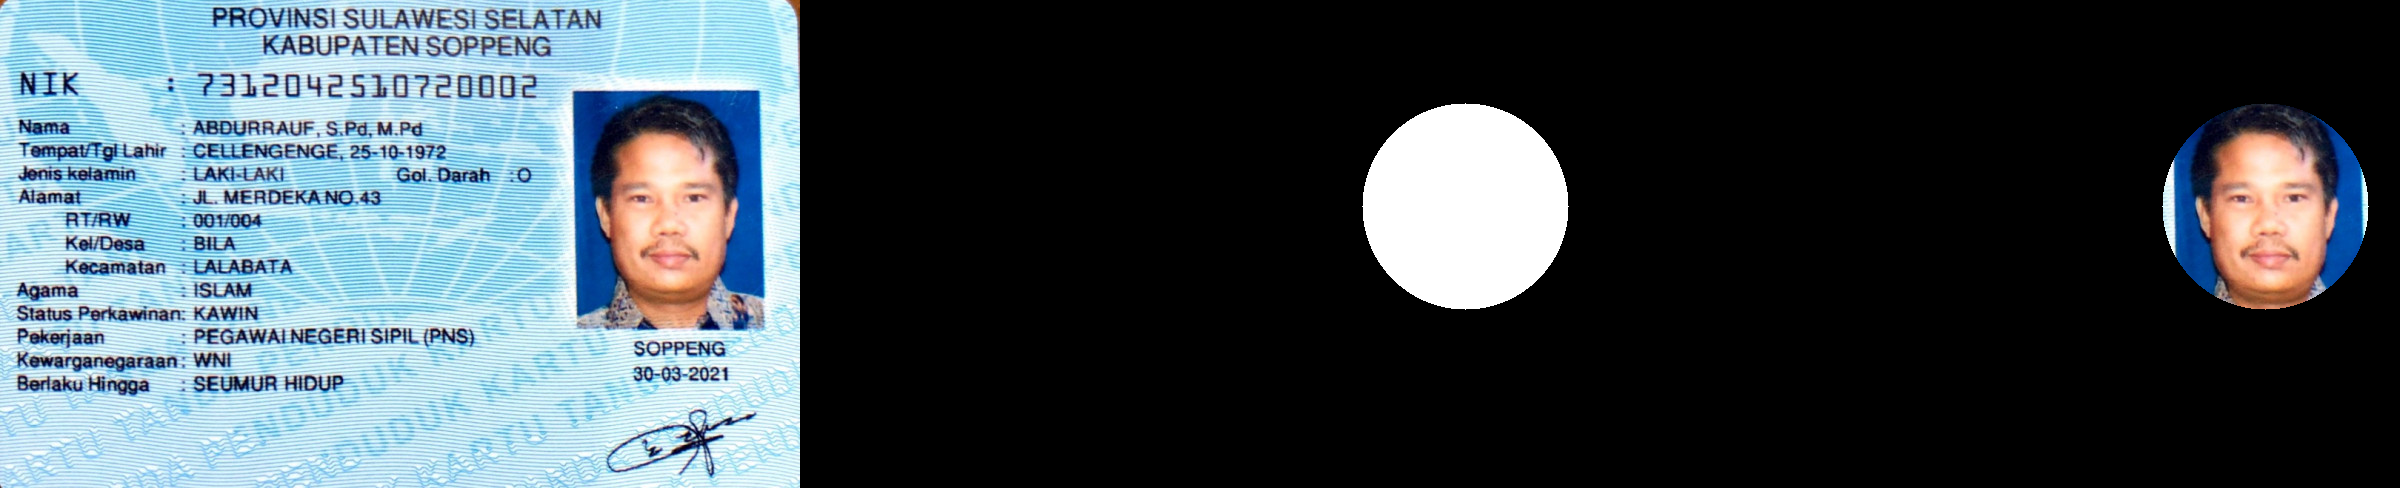

In [62]:
# Membaca gambar asli
original_image = cv.imread('/content/drive/MyDrive/PCVK/img/KTP.jpeg')

# Menentukan pusat dan jari-jari lingkaran pertama
center1 = (665, 206)  # (x, y) coordinates of the center of the first circle
radius1 = 103

# Membuat gambar  kosong
mask = np.zeros(original_image.shape, dtype=np.uint8)

# Gambarlah lingkaran pertama pada mask
cv.circle(mask, center1, radius1, (255, 255, 255), thickness=-1)  # White circle on black background

# Melakukan operasi AND
masked = cv.bitwise_and(original_image, mask)

# Menampilkan gambar asli dan hasilnya
result = cv.hconcat((original_image, mask, masked))
cv2_imshow(result)

**NAND (Not And)**

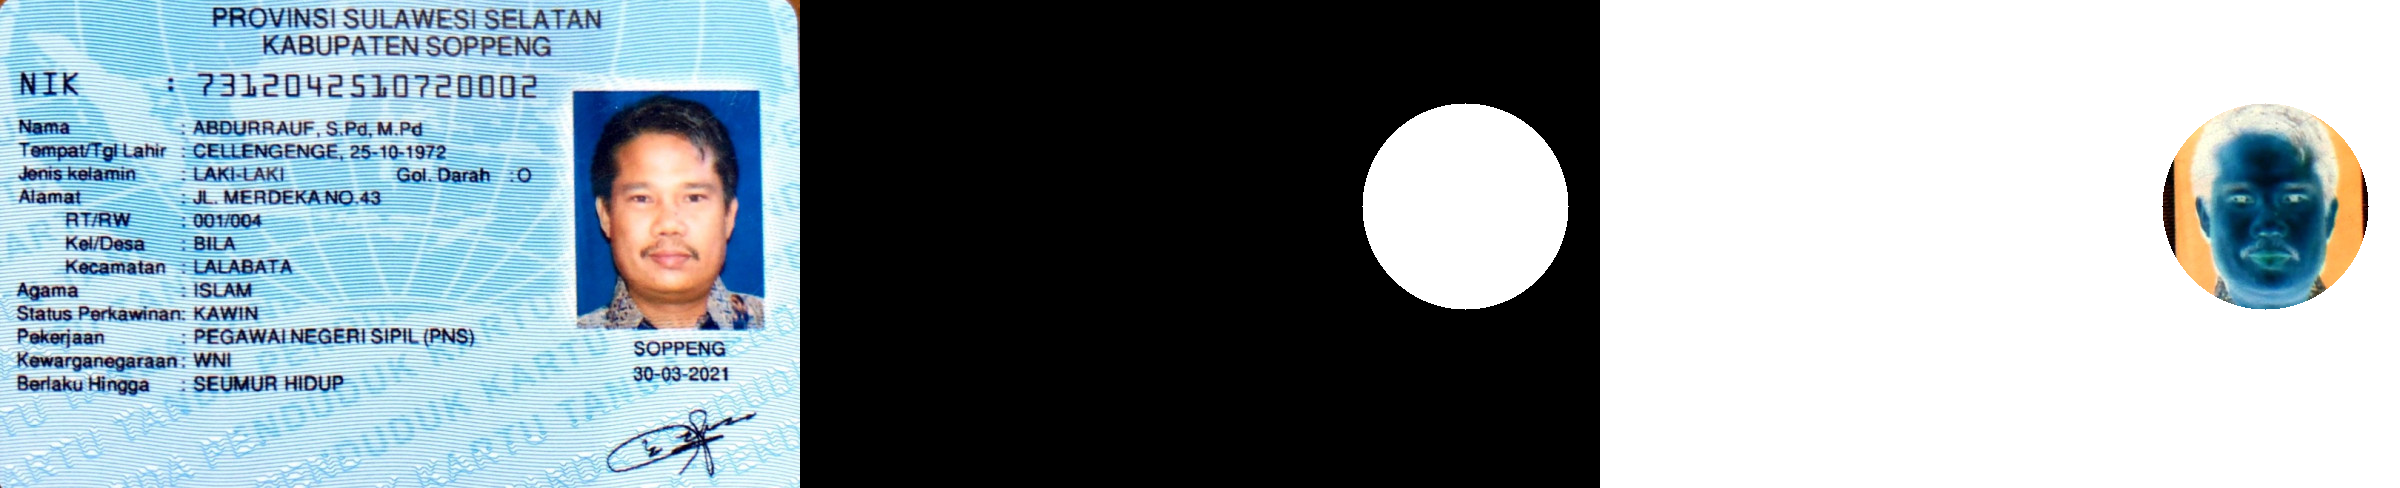

In [64]:
# Membaca gambar asli
original_image = cv.imread('/content/drive/MyDrive/PCVK/img/KTP.jpeg')

# Menentukan pusat dan jari-jari lingkaran pertama
center1 = (665, 206)  # (x, y) coordinates of the center of the first circle
radius1 = 103

# Membuat gambar  kosong
mask = np.zeros(original_image.shape, dtype=np.uint8)

# Gambarlah lingkaran pertama pada mask
cv.circle(mask, center1, radius1, (255, 255, 255), thickness=-1)  # White circle on black background

# Melakukan operasi NAND
masked = cv.bitwise_not(cv.bitwise_and(original_image, mask))

# Menampilkan gambar asli dan hasilnya
result = cv.hconcat((original_image, mask, masked))
cv2_imshow(result)

XOR (Exclusive Or)

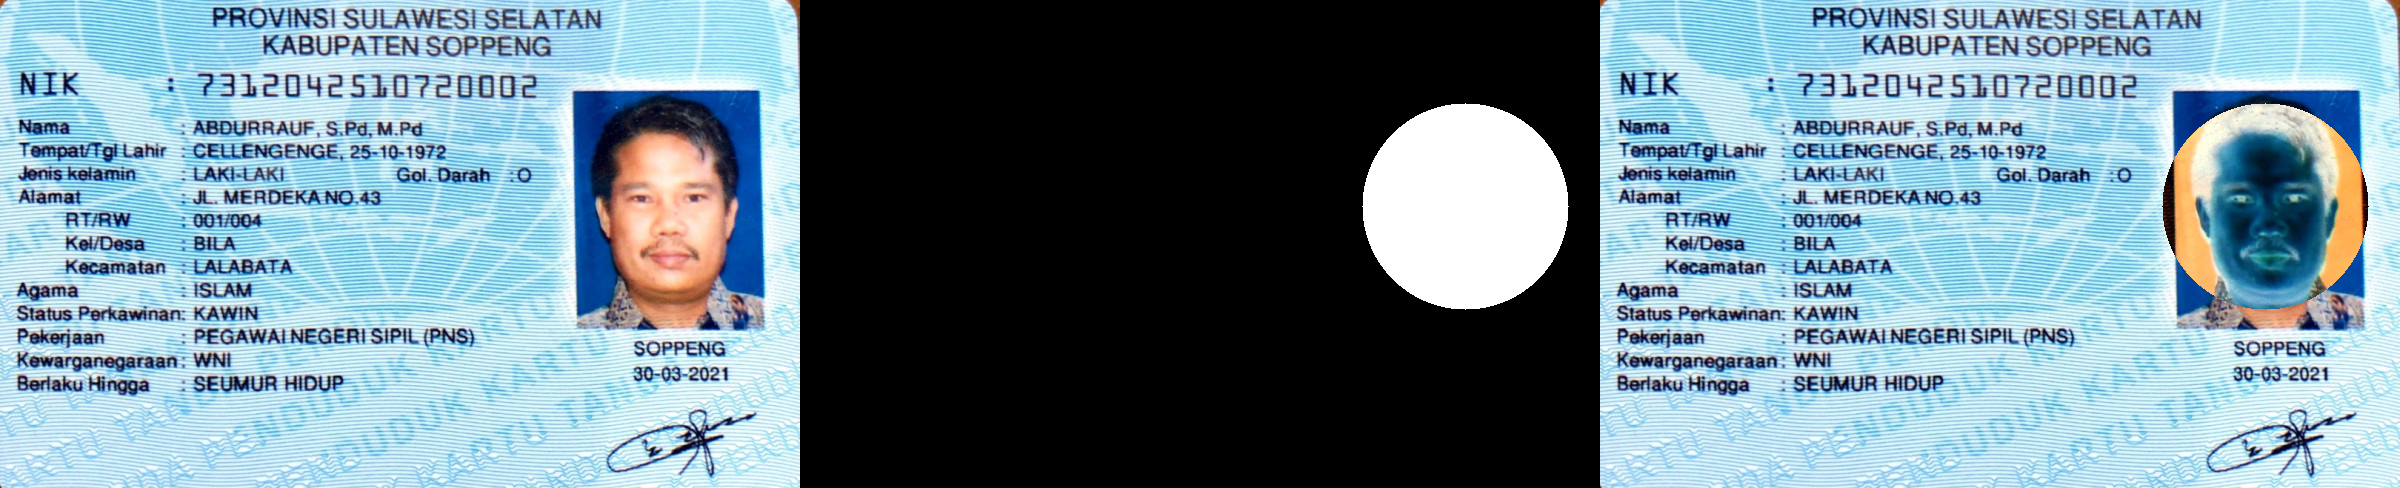

In [65]:
# Membaca gambar asli
original_image = cv.imread('/content/drive/MyDrive/PCVK/img/KTP.jpeg')

# Menentukan pusat dan jari-jari lingkaran pertama
center1 = (665, 206)  # (x, y) coordinates of the center of the first circle
radius1 = 103

# Membuat gambar  kosong
mask = np.zeros(original_image.shape, dtype=np.uint8)

# Gambarlah lingkaran pertama pada mask
cv.circle(mask, center1, radius1, (255, 255, 255), thickness=-1)  # White circle on black background

# Melakukan operasi XOR
masked = cv.bitwise_xor(original_image, mask)

# Menampilkan gambar asli dan hasilnya
result = cv.hconcat((original_image, mask, masked))
cv2_imshow(result)

Ketika melakukan operasi bitwise pada citra dengan operator NOT, OR, AND, NAND, dan XOR, hasilnya tergantung pada nilai piksel pada citra asli (original image) dan mask (lingkaran putih) yang digunakan dalam operasi tersebut. Berikut adalah hasil analisa untuk setiap operasi bitwise:

a. **NOT (Negasi):**
   - Hasil operasi NOT adalah citra yang menggambarkan negasi dari citra asli. Artinya, di mana citra asli memiliki piksel hitam, hasilnya akan menjadi piksel putih, dan sebaliknya.
   - Bagian dalam lingkaran (bagian muka pada gambar KTP) menjadi hitam karena sebelumnya adalah putih, sedangkan bagian luar lingkaran tetap hitam.

b. **OR (Logika OR):**
   - Hasil operasi OR adalah citra yang menggambarkan hasil logika OR antara citra asli dan mask. Jika salah satu dari kedua citra tersebut memiliki piksel putih, maka hasilnya akan menjadi putih, jika keduanya hitam, maka hasilnya akan hitam.
   - Sebagian besar citra asli tetap tidak berubah, tetapi area dalam lingkaran menjadi putih karena dioperasikan dengan mask yang memiliki lingkaran putih.

c. **AND (Logika AND):**
   - Hasil operasi AND adalah citra yang menggambarkan hasil logika AND antara citra asli dan mask. Piksel akan menjadi putih hanya jika keduanya adalah putih, jika salah satu dari keduanya adalah hitam, hasilnya akan menjadi hitam.
   - Area dalam lingkaran menjadi hitam karena dioperasikan dengan mask yang memiliki lingkaran putih.

d. **NAND (Logika NAND):**
   - Hasil operasi NAND adalah kebalikan dari hasil operasi AND. Piksel akan menjadi putih jika salah satu dari keduanya adalah hitam, dan hanya menjadi hitam jika keduanya adalah putih.
   - Area dalam lingkaran menjadi putih karena dioperasikan dengan mask yang memiliki lingkaran putih.

e. **XOR (Logika XOR):**
   - Hasil operasi XOR adalah citra yang menggambarkan hasil logika XOR antara citra asli dan mask. Piksel akan menjadi putih hanya jika salah satu dari kedua citra tersebut adalah putih, tetapi tidak keduanya putih atau hitam. Piksel akan menjadi hitam jika keduanya adalah hitam atau keduanya adalah putih.
   - Area dalam lingkaran menjadi hitam karena dioperasikan dengan mask yang memiliki lingkaran putih.